In [40]:
import networkx as nx 
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [41]:
import os

def find_repo_root(start_path):
    """
    useful general function for finding the (first, closest) repo root so github file paths work the same on different machines 
    """
    current_path = os.path.abspath(start_path)
    
    while True:
        # Check for the existence of the .git directory or other indicators
        if os.path.isdir(os.path.join(current_path, '.git')) or \
           os.path.isfile(os.path.join(current_path, 'README.md')):
            return current_path
        
        parent_path = os.path.dirname(current_path)
        
        # Stop if we reach the root directory
        if parent_path == current_path:
            break
        
        current_path = parent_path

    return None  # Return None if not found

root = find_repo_root(os.getcwd())
print(root)

c:\Users\fitsl\Documents\Programming\UVM Programming Classes\PoCS\pocs_project


In [42]:
tropes_df = pd.read_csv(f"{root}/Data/letterboxd_search.csv", index_col=0)
tropes_df['nu_tropes'] = tropes_df['Tropes'].apply(lambda x: x.split(","))
tropes_df['length'] = tropes_df['nu_tropes'].apply(lambda x : len(x))
tropes_df.sort_values(by='length', ascending=False)
movies_with_trope = tropes_df[tropes_df['nu_tropes'].apply(lambda x: 'ADR' in x)]['Movie']
movies_with_trope

686                   Galaxy  Quest
1590            Some  Like  It  Hot
2247                      The  Room
2402           The  Phantom  Menace
3126                    James  Bond
10725     The  Lord  Of  The  Rings
10932    The  Empire  Strikes  Back
12627                     Hot  Fuzz
Name: Movie, dtype: object

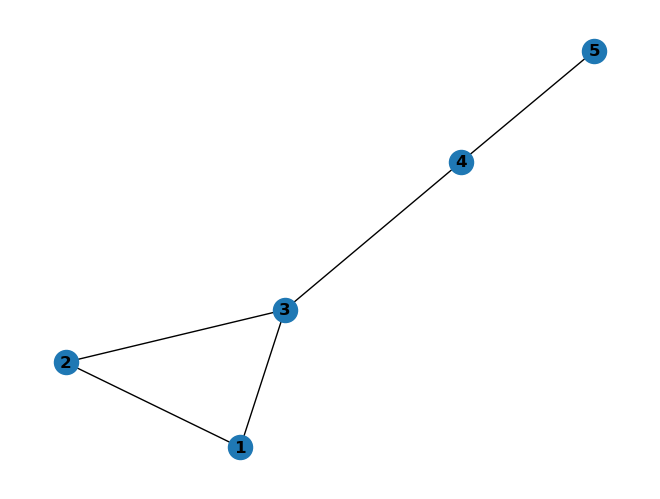

Nodes: [1, 2, 3, 4, 5]
Edges: [(1, 2, {'weight': 1}), (1, 3, {'weight': 5}), (2, 3, {'weight': 2}), (3, 4, {'weight': 3}), (4, 5, {'weight': 4})]


In [43]:
# Sample DataFrame with source and target columns
data = {
    'source': [1, 2, 3, 4, 1],
    'target': [2, 3, 4, 5, 3],
    'weight': [1, 2, 3, 4, 5]  # Optional attribute (e.g., edge weight)
}

df = pd.DataFrame(data)

# Create a Graph using NetworkX
G = nx.from_pandas_edgelist(df, source='source', target='target', edge_attr='weight')

# Visualize the graph
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

# Print some graph details
print("Nodes:", G.nodes)
print("Edges:", G.edges(data=True))


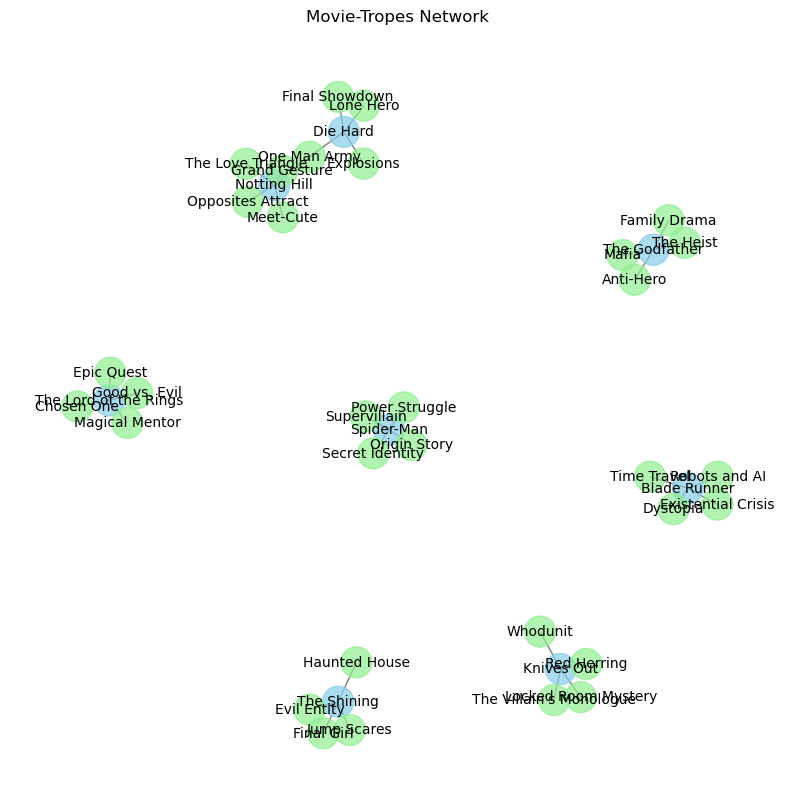

In [44]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Create a graph object
G = nx.Graph()

# Step 2: Define Movies and their associated Tropes
movies_tropes = {
    'Die Hard': ['Lone Hero', 'Explosions', 'Final Showdown', 'One Man Army'],
    'Notting Hill': ['Meet-Cute', 'Opposites Attract', 'The Love Triangle', 'Grand Gesture', 'One Man Army'],
    'The Shining': ['Final Girl', 'Haunted House', 'Evil Entity', 'Jump Scares'],
    'Blade Runner': ['Time Travel', 'Robots and AI', 'Dystopia', 'Existential Crisis'],
    'The Lord of the Rings': ['Chosen One', 'Epic Quest', 'Good vs. Evil', 'Magical Mentor'],
    'The Godfather': ['The Heist', 'Family Drama', 'Anti-Hero', 'Mafia'],
    'Spider-Man': ['Origin Story', 'Secret Identity', 'Supervillain', 'Power Struggle'],
    'Knives Out': ['Whodunit', 'Red Herring', 'Locked Room Mystery', 'The Villain\'s Monologue']
}

# Step 3: Add nodes and edges to the graph
for movie, tropes in movies_tropes.items():
    # Add the movie as a node
    G.add_node(movie, type='movie')
    
    # Add tropes as nodes and connect them to the movie
    for trope in tropes:
        G.add_node(trope, type='trope')
        G.add_edge(movie, trope)

# Step 4: Visualize the Network
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)  # Layout for better visualization

# Draw nodes: Movies with blue, Tropes with green
node_colors = ['skyblue' if G.nodes[node]['type'] == 'movie' else 'lightgreen' for node in G.nodes]

# Draw the edges
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)

# Draw the nodes with labels
nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors, alpha=0.7)

plt.title("Movie-Tropes Network")
plt.axis('off')  # Hide axis
plt.show()


In [45]:
df = pd.read_csv(f"{root}/Data/2020_trope_data/2020_updated_tropeset.csv")


In [46]:
genre_columns = df.filter(like='GENRE', axis=1).columns
genre_columns = genre_columns.tolist() 
movie_columns =[ 'Id', 'NameTvTropes', 'NameIMDB', 'Rating', 'Votes', 'Year']
exclude_columns = genre_columns + movie_columns
tropes = df.drop(columns=exclude_columns).columns
tropes = tropes.tolist()
df.columns = df.columns.str.replace(r'\[GENRE\]', '', regex=True)
genre_columns = [col.replace('[GENRE]', '') for col in genre_columns]
print("")


In [47]:
df.head()

,Id,NameTvTropes,NameIMDB,Rating,Votes,Year,ABNegative,ABirthdayNotABreak,ABloodyMess,ABoyAGirlAndABabyFamily,...,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,\N
0,tt2926810,ABCsOfDeath2,ABCs of Death 2,5.4,7382.0,2014,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt3224458,ABeautifulDayInTheNeighborhood,A Beautiful Day in the Neighborhood,0.0,0.0,2019,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0268978,ABeautifulMind,A Beautiful Mind,8.2,767687.0,2001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0092263,ABetterTomorrow,A Better Tomorrow,7.6,18562.0,1986,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt1582465,ABirdersGuideToEverything,A Birder's Guide to Everything,6.3,1933.0,2013,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Use stack to reshape the DataFrame: tropes only where the value is 1
stacked_df = df.set_index(['Id', 'NameTvTropes'])[tropes].stack()
stacked_df = stacked_df[stacked_df == 1].reset_index()

# Now, group by 'Id' to get a list of tropes for each show
df_tropes = stacked_df.groupby('Id')['level_2'].apply(list).reset_index(name='tropes')

# Merge this back with the original DataFrame (if needed)
df = df.merge(df_tropes, on='Id')

# Drop the individual trope columns and display the result
df = df.drop(columns=tropes)



In [49]:
for trope in df[df['NameIMDB'] == 'Alien']['tropes']:
    print(trope)

['AFatherToHisMen', 'AIIsACrapshoot', 'AcceptableTargets', 'ActionGirl', 'ActionSurvivor', 'ActivationSequence', 'AdmiringTheAbomination', 'AirVentPassageway', 'AlienBlood', 'AlienSky', 'AllThereInTheManual', 'AllWebbedUp', 'AntiHero', 'AnyoneCanDie', 'ArbitrarySkepticism', 'ArtificialGravity', 'ArtisticLicenseBiology', 'AskAStupidQuestion', 'AudienceSurrogate', 'BadBoss', 'BaitAndSwitch', 'BarbieDollAnatomy', 'BigBadEnsemble', 'BittersweetEnding', 'BizarreAlienReproduction', 'BlatantLies', 'BookEnds', 'BrokenFaceplate', 'CanonDiscontinuity', 'CaptainObvious', 'CaptainsLog', 'CatScare', 'CatchPhrase', 'ChestBurster', 'Chickification', 'ClosedCircle', 'ClothingDamage', 'ContinuousDecompression', 'CranialProcessingUnit', 'CuriosityKilledTheCast', 'DeadStarWalking', 'DeadpanSnarker', 'DeathByTransceiver', 'DeathWorld', 'DeerInTheHeadlights', 'DieHardOnAnX', 'DilatingDoor', 'Discussed', 'DiscussedTrope', 'DistressCall', 'DoYouWantToCopulate', 'DoesThisRemindYouOfAnything', 'DoubleEntendre'

In [55]:
df.head()

,Id,NameTvTropes,NameIMDB,Rating,Votes,Year,Action,Adult,Animation,Biography,...,Film-Noir,Game-Show,History,News,Sci-Fi,Short,Sport,War,\N,tropes
0,tt2926810,ABCsOfDeath2,ABCs of Death 2,5.4,7382.0,2014,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[AbusiveParents, AirVentPassageway, AndIMustSc..."
1,tt3224458,ABeautifulDayInTheNeighborhood,A Beautiful Day in the Neighborhood,0.0,0.0,2019,0,0,0,1,...,0,0,0,0,0,0,0,0,0,"[Drama, IncorruptiblePurePureness, LooselyBase..."
2,tt0268978,ABeautifulMind,A Beautiful Mind,8.2,767687.0,2001,0,0,0,1,...,0,0,0,0,0,0,0,0,0,"[AdultFear, AllThereIsToKnowAboutTheCryingGame..."
3,tt0092263,ABetterTomorrow,A Better Tomorrow,7.6,18562.0,1986,1,0,0,0,...,0,0,0,0,0,0,0,0,0,"[BackupTwin, BadassInANiceSuit, BadassLongcoat..."
4,tt1582465,ABirdersGuideToEverything,A Birder's Guide to Everything,6.3,1933.0,2013,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[Adventure, AndStarring, AsianAndNerdy, BigApp..."


In [63]:
from itertools import chain
import numpy as np

# Initialize an empty bipartite graph
B = nx.Graph()

# Add nodes with the bipartite attribute (left and right sets)
B.add_nodes_from(df['NameTvTropes'], bipartite=0)  # Left set: NameTvTropes values
tropes = set(chain(*df['tropes']))  # Flatten the list of lists and remove duplicates
B.add_nodes_from(tropes, bipartite=1)

# Vectorized edge creation using numpy
# Repeat the NameTvTropes values according to the length of the tropes list
names_expanded = np.repeat(df['NameTvTropes'].values, df['tropes'].apply(len).values)

# Flatten the tropes column into a single list (flattening lists into 1D)
tropes_expanded = np.concatenate(df['tropes'].values)

# Combine them into pairs (edges)
edges = list(zip(names_expanded, tropes_expanded))

B.add_edges_from(edges)
print("Number of nodes:", B.number_of_nodes())
print("Number of edges:", B.number_of_edges())

Number of nodes: 36232
Number of edges: 544136


In [65]:
print("\nDegree of each node:")
print(dict(B.degree()))


Degree of each node:
{'ABCsOfDeath2': 102, 'ABeautifulDayInTheNeighborhood': 3, 'ABeautifulMind': 65, 'ABetterTomorrow': 56, 'ABirdersGuideToEverything': 12, 'ABittersweetLife': 12, 'ABoyAndHisDog': 33, 'ABreathOfScandal': 5, 'ABridesRevenge': 33, 'ABridgeTooFar': 95, 'ABrighterSummerDay': 11, 'ABronxMorning': 8, 'ABronxTale': 114, 'ABucketOfBlood': 11, 'ABulletForTheGeneral': 46, 'ACanterburyTale': 20, 'ACaseOfSpringFever': 24, 'AChairyTale': 12, 'AChineseGhostStory': 48, 'AChristmasCarol1938': 18, 'AChristmasCarol1984': 62, 'AChristmasCarol1999': 42, 'AChristmasCarol2000': 16, 'AChristmasCarolGoesWrong': 39, 'AChristmasCarolTheMusical': 61, 'AChristmasHorrorStory': 9, 'AChristmasPrince': 55, 'AChristmasStory': 186, 'ACinderellaStory': 85, 'ACinderellaStoryOnceUponASong': 50, 'AClockworkOrange': 262, 'AColtIsMyPassport': 12, 'ACornerInWheat': 17, 'ACountryChristmas': 21, 'ACureForPokeritis': 8, 'ACureForWellness': 70, 'ADangerousMethod': 58, 'ADarkSong': 23, 'ADateWithYourFamily': 14

In [ ]:
import community as community_louvain
import networkx as nx

# Apply Louvain method to detect communities
partition = community_louvain.best_partition(B)

# Print the communities
print("Communities detected by Louvain method:")
print(partition)

# Visualize the communities by coloring nodes based on their community
import matplotlib.pyplot as plt
pos = nx.spring_layout(B)

# Get colors based on communities
node_colors = [partition[node] for node in B.nodes()]

# Draw the graph with community coloring
nx.draw(B, pos, with_labels=True, node_size=2000, font_size=10, node_color=node_colors, cmap=plt.cm.jet)
plt.show()



Communities detected by Louvain method:
{'ABCsOfDeath2': 0, 'ABeautifulDayInTheNeighborhood': 1, 'ABeautifulMind': 2, 'ABetterTomorrow': 1, 'ABirdersGuideToEverything': 3, 'ABittersweetLife': 1, 'ABoyAndHisDog': 2, 'ABreathOfScandal': 3, 'ABridesRevenge': 0, 'ABridgeTooFar': 1, 'ABrighterSummerDay': 2, 'ABronxMorning': 3, 'ABronxTale': 2, 'ABucketOfBlood': 0, 'ABulletForTheGeneral': 1, 'ACanterburyTale': 3, 'ACaseOfSpringFever': 3, 'AChairyTale': 3, 'AChineseGhostStory': 0, 'AChristmasCarol1938': 3, 'AChristmasCarol1984': 3, 'AChristmasCarol1999': 3, 'AChristmasCarol2000': 2, 'AChristmasCarolGoesWrong': 0, 'AChristmasCarolTheMusical': 3, 'AChristmasHorrorStory': 0, 'AChristmasPrince': 3, 'AChristmasStory': 2, 'ACinderellaStory': 3, 'ACinderellaStoryOnceUponASong': 3, 'AClockworkOrange': 1, 'AColtIsMyPassport': 3, 'ACornerInWheat': 2, 'ACountryChristmas': 3, 'ACureForPokeritis': 3, 'ACureForWellness': 0, 'ADangerousMethod': 2, 'ADarkSong': 0, 'ADateWithYourFamily': 2, 'ADayAtTheRaces': 

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import community as community_louvain

# Apply Louvain method to detect communities
partition = community_louvain.best_partition(B)

# Specify the community ID you want to visualize (e.g., Community 0)
community_id = 0  # Change this to the community you want to visualize

# Get the nodes in that community
community_nodes = [node for node, comm in partition.items() if comm == community_id]

# Get the subgraph only containing nodes in the selected community
# But keep the edges connected to other communities as well
edges_in_community = [(u, v) for u, v in B.edges() if u in community_nodes or v in community_nodes]

# Create a subgraph containing only relevant edges
subgraph = B.edge_subgraph(edges_in_community)

# Get colors based on communities for the full graph
node_colors = [partition[node] for node in B.nodes()]

# Draw the entire graph but highlight nodes and edges in the selected community
pos = nx.spring_layout(B)
plt.figure(figsize=(10, 8))

# Draw the full graph with community coloring
nx.draw(B, pos, with_labels=True, node_size=2000, font_size=10, node_color=node_colors, cmap=plt.cm.jet)

# Highlight the nodes in the selected community
highlight_nodes = community_nodes
nx.draw_networkx_nodes(B, pos, nodelist=highlight_nodes, node_color='orange', node_size=3000)

# Highlight edges that connect nodes in the selected community
highlight_edges = edges_in_community
nx.draw_networkx_edges(B, pos, edgelist=highlight_edges, edge_color='orange', width=2)

plt.show()


In [ ]:
from pyvis.network import Network

# Create a PyVis network
net = Network(notebook=True)

# Add nodes and edges to the network from your graph B
net.from_nx(B)

# Apply Louvain partition and color nodes by community
net.set_options("""
var options = {
  "nodes": {
    "color": {
      "highlight": {
        "background": "orange",
        "border": "orange"
      }
    }
  }
}
""")

# Visualize the network
net.show("graph.html")


In [ ]:
import pandas as pd
import networkx as nx
import itertools

# Read data
tropes_df = pd.read_csv(f"{root}/Data/letterboxd_search.csv", index_col=0)

# Make a copy and process the 'Tropes' column
df = tropes_df.copy()
df['nu_tropes'] = df['Tropes'].apply(lambda x: x.split(","))

# Filter for movies that have the 'ShoutOut' trope
df = df[df['nu_tropes'].apply(lambda x: 'ShoutOut' in x)]

# Take the first 100 rows for simplicity
df = df.iloc[:25].copy()

# Create a graph and add movies as nodes
G = nx.Graph()
for movie in df['Movie']:
    G.add_node(movie)

# Get a list of all unique tropes (using .explode() and .unique())
tropes = df['nu_tropes'].explode().unique().tolist()

# Create edges based on shared tropes
for trope in tropes:
    # Get movies that have this trope
    movies_with_trope = df[df['nu_tropes'].apply(lambda x: trope in x)]
    
    # Find all pairs of movies with this trope
    for movie1, movie2 in itertools.combinations(movies_with_trope['Movie'], 2):
        # Get the tropes for each movie from the 'nu_tropes' column
        tropes1 = set(movies_with_trope[movies_with_trope['Movie'] == movie1]['nu_tropes'].iloc[0])
        tropes2 = set(movies_with_trope[movies_with_trope['Movie'] == movie2]['nu_tropes'].iloc[0])

        # Get the intersection of the movies' tropes
        common_tropes = tropes1.intersection(tropes2)
        
        # If there are common tropes, create an edge with the weight of shared tropes
        if len(common_tropes):
            # print(movie1, movie2, common_tropes)
            G.add_edge(movie1, movie2, shared_tropes=len(common_tropes))

# Now you can do something with the graph 'G', like drawing or analyzing it.


Team  America  World  Police Quantum  Of  Solace {'CruelAndUnusualDeath', 'PunnyName', 'AmericaSavesTheDay', 'EagleLand', 'CoolCar', 'UpToEleven', 'Foreshadowing', 'WhatTheHellHero', 'ActionGirl', 'BigBad', 'TheDragon', 'EvilPlan', 'ChekhovsGun', 'CoolCars', 'WhatHappenedToTheMouse', 'NotSoDifferent', 'Eagleland', 'MeaningfulName', 'ShoutOut', 'BlatantLies', 'OhCrap', 'UnwittingPawn', 'RealityIsUnrealistic', 'SequelHook', 'YouHaveFailedMe', 'NeverHeardThatOneBefore', 'HateSink', 'VillainousBreakdown', 'ImperialStormtrooperMarksmanshipAcademy'}
Team  America  World  Police Shocking  Dark {'ActionGirl', 'ShoutOut', 'WorldOfHam'}
Team  America  World  Police Fifty  First  Dates {'WhatHappenedToTheMouse', 'ActionGirl', 'FilmsOf20002004', 'BrickJoke', 'VomitIndiscretionShot', 'ShoutOut', 'Foreshadowing', 'RunningGag'}
Quantum  Of  Solace Shocking  Dark {'ActionGirl', 'MegaCorp', 'ShoutOut', 'TheMole', 'Expy', 'InNameOnly'}
Quantum  Of  Solace Fifty  First  Dates {'Tagline', 'ActionGirl', 'W

Visualize the graph

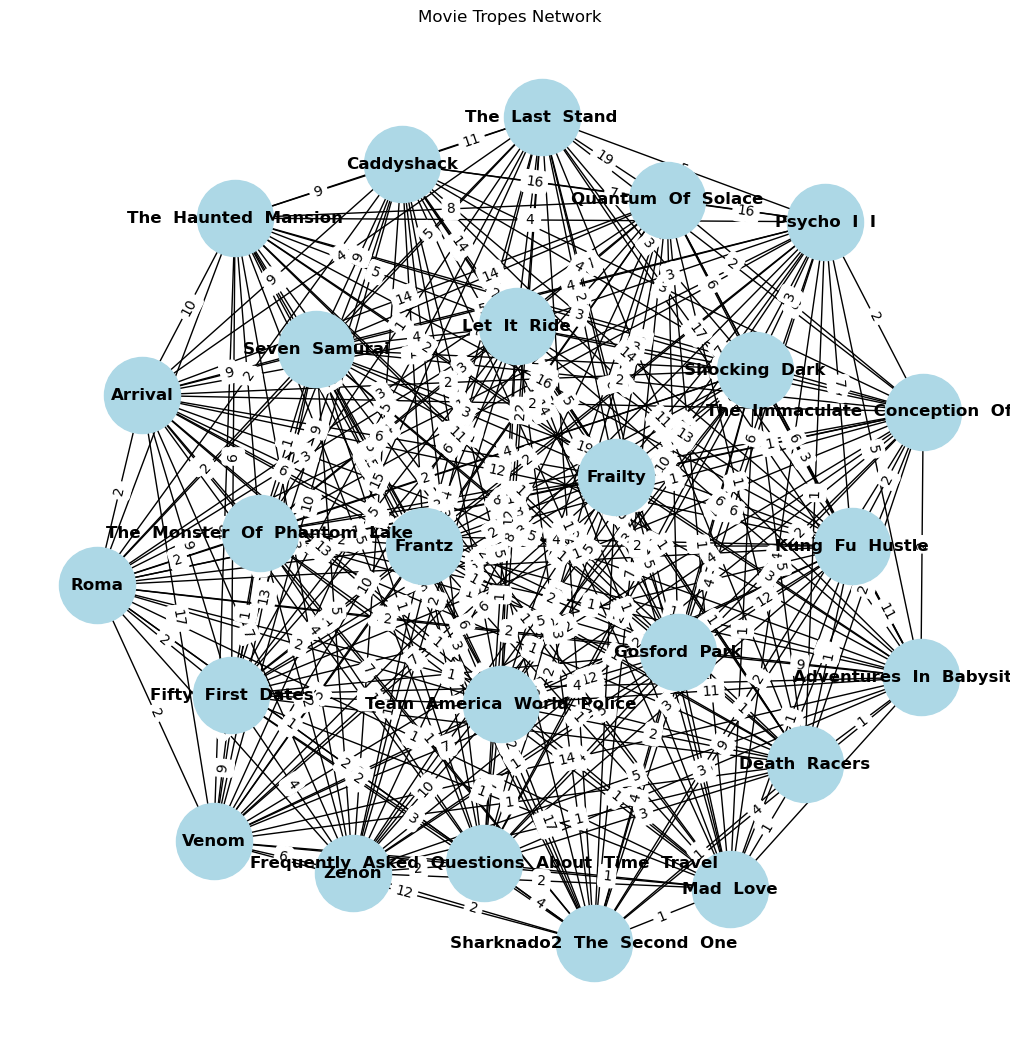

In [ ]:
node_labels = nx.get_node_attributes(G, 'label')
edge_labels = nx.get_edge_attributes(G, 'shared_tropes')

edges_with_shared_tropes = [(u, v) for u, v, data in G.edges(data=True) if data.get('shared_tropes')]
# Create a subgraph from the filtered edges
G_filtered = G.edge_subgraph(edges_with_shared_tropes).copy()

# If you're using matplotlib to visualize the graph:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_filtered)  # Layout for better positioning

# Draw the graph with node and edge labels
nx.draw(G_filtered, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=12, font_weight='bold')
nx.draw_networkx_labels(G_filtered, pos, labels=node_labels)
nx.draw_networkx_edge_labels(G_filtered, pos, edge_labels=edge_labels)

plt.title("Movie Tropes Network")
plt.show()